<a href="https://colab.research.google.com/github/MbuyiseloNtando/Airspace-Forecasting/blob/main/Forecast_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MbuyiseloNtando/Airspace-Forecasting/main/AirForecast.csv')

In [4]:
df.head()

,Year,AirSpace,Flights,ForeCast,GrowthRate
0,2022,Euro,9200000,High,0.0
1,2023,Euro,10200000,High,10.1
2,2024,Euro,11100000,High,8.8
3,2025,Euro,11500000,High,3.6
4,2026,Euro,11900000,High,3.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        30 non-null     int64  
 1   AirSpace    30 non-null     object 
 2   Flights     30 non-null     int64  
 3   ForeCast    30 non-null     object 
 4   GrowthRate  30 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


In [6]:
df['Passangers'] =1
df

,Year,AirSpace,Flights,ForeCast,GrowthRate,Passangers
0,2022,Euro,9200000,High,0.0,1
1,2023,Euro,10200000,High,10.1,1
2,2024,Euro,11100000,High,8.8,1
3,2025,Euro,11500000,High,3.6,1
4,2026,Euro,11900000,High,3.5,1
5,2027,Euro,12300000,High,3.7,1
6,2022,Euro,9200000,Base,0.0,1
7,2023,Euro,10200000,Base,10.1,1
8,2024,Euro,10900000,Base,6.9,1
9,2025,Euro,11100000,Base,1.8,1


In [7]:
df.isnull().sum()

Year          0
AirSpace      0
Flights       0
ForeCast      0
GrowthRate    0
Passangers    0
dtype: int64

In [8]:
df.AirSpace.unique()

array(['Euro', 'FAA'], dtype=object)

In [9]:
df.value_counts().sum()

30

In [10]:
df.duplicated(subset='GrowthRate').sum()

9

In [11]:
df.duplicated().sum()

0

In [21]:
df = pd.DataFrame({
    'Data' : ['1997_M_US_1',
              '1990$_M_UK_1',
              '1992_F_US_2',
              '1970$_M_   IT_1',
              '1985_F_I  T_2'
              ]
})
df

,Data
0,1997_M_US_1
1,1990$_M_UK_1
2,1992_F_US_2
3,1970$_M_ IT_1
4,1985_F_I T_2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [22]:
df = df['Data'].str.split('_', expand=True)

In [23]:
df.columns = ['Year', 'Gender', 'Country', 'No. children']

In [24]:
df

,Year,Gender,Country,No. children
0,1997,M,US,1
1,1990$,M,UK,1
2,1992,F,US,2
3,1970$,M,IT,1
4,1985,F,I T,2


In [25]:
dollar_cols = []
space_cols = []


for col in df.columns:
  if df[col].dtype=="object":
      if df[col].str.contains("$").any():
        dollar_cols.append(col)
      if df[col].str.contains(" ").any():
        space_cols.append(col)

for col in dollar_cols:
  df[col]=df[col].str.replace("$","")
for col in space_cols:
  df[col]=df[col].str.replace(" ","")


In [26]:
df

,Year,Gender,Country,No. children
0,1997,M,US,1
1,1990,M,UK,1
2,1992,F,US,2
3,1970,M,IT,1
4,1985,F,IT,2


In [28]:
df.index = ["John", "Mike", "Mary", "John", "Joony"]

In [29]:
df

,Year,Gender,Country,No. children
John,1997,M,US,1
Mike,1990,M,UK,1
Mary,1992,F,US,2
John,1970,M,IT,1
Joony,1985,F,IT,2


In [33]:
df.duplicated(subset=["Year"])

John     False
Mike     False
Mary     False
John     False
Joony    False
dtype: bool

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

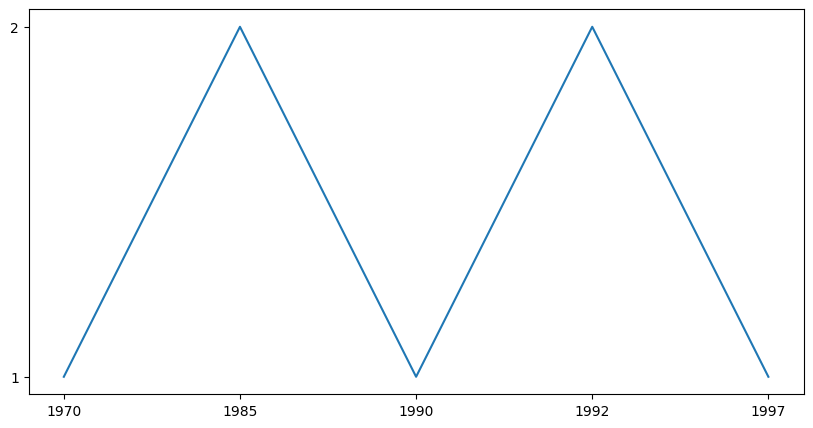

In [42]:
fig, axes = plt.subplots(figsize = (10,5))
axes.plot(df.groupby('Year')['No. children'].sum())